<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de discontinuidades

En procesamiento de imágenes, las discontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones. El objetivo de detectar estas descontinuidades es obtener mejor información sobre los objetos representados, ayudando a reducir la cantidad de data a ser procesada después.

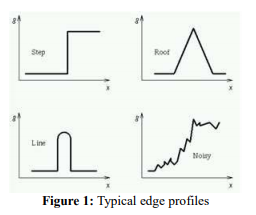

*Figura extraída de Rani & Kumari, para International Journal of Science and Research (2016)*

Gráficamente, ver la variación del nivel de gris en la posición permite identificar el tipo de discontinuidad presente en una región.

Sharifi (2002), divide a los detectores de de contornos, o discontinuidades, en:
* **Detectores de gradiente**: Los operadores **clásicos**, usan la primera derivada direccional. Algoritmos como Sobel (1970), Prewitt (1970), Kirsch (1971), etc. Sus ventajas son la **simplicidad** y la detección de la **orientación** de los bordes; sin embargo, presentan **sensitividad al ruido** y pueden no ser precisos.

* **Zero Crossing**: aquellos que utilizan segunda derivada,incluye el operador Laplaciano y segunda derivada direccional. Detecta los contornos y su **orientación**, además de tener características fijas para todas las direcciones. Sin embargo, también presentan **sensitividad** al ruido y pueden repetir respuesta a algunos bordes ya detectados.

* **Laplacian of Gaussian (LoG)**: inventado por Marr y Hildreth (1980), combinando filtro Gaussiano con el Laplaciano. No es muy común en el área de *computer vision*. Pueden encontrar los lugares correctos de los bordes, y examinan una mayor área alrededor de un pixel. Sin embargo, **no encuentra orientación** y puede **malfuncionar en esquinas**.

* **Gaussianos**: Simétricos a lo largo del borde, y reducen el ruido al suavizar la imagen. Los más destacados son Canny e ISEF (Shen-Castan), que convolucionan la imagen con la función Gaussiana para Canny, y la derivada ISEF para ShenCastan. Las ventaja de estos detectores son el uso de técnicas estadísticas de probabilidad para encontrar una **razón de error, localización, y mejor manejo de ruido**. Estas operaciones resultan en operaciones complejas y que **consumen tiempo**.

* **Detectores de contornos coloridos**: Se dividen en métodos de fusión de output, métodos de gradiente multidimensional,  y métodos con vectores. Resultan precisos y más eficientes en **reconocimiento de objetos**; sin embargo, son **complejos**.

####Detectores con Gradiente

> *Imágenes extraídas de Programmersought*



#####Operador de Roberts

Introducida por Lawrence Roberts en 1965, es una operación computacional simple. Enfatiza regiones de alta frequencia espacial, que normalmente corresponden a bordes. Recibe una imagen en escala de grises, y lo más común es devolver la misma filtrada.

Mide la gradiente espacial en dos dimensiones. De manera simplificada, computa la diferencia local.

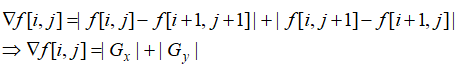

La expresión puede representarse con la siguiente máscara:

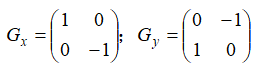

Obteniendo así los bordes horizontales o verticales, o ambos si se suman las imágenes resultantes.

#####Operador de Sobel

Introducida en 1970, el método de Sobel de detección de bordes para segmentación de imágenes encuentra contornos usando la aproximación de Sobel a la derivada. Resalta regiones con alta frecuencia espacial, y generalmente se emplea para hallar la magnitud absoluta estimada de la gradiente en cada punto de la imagen en escala de grises. (Rani & Kumari, 2016)

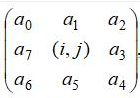

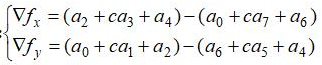

Sobel, a diferencia de Roberts, computa los valores de la gradiente en el dominio 3*3. Las expresiones de las gradientes puden representarse con máscaras:

Con c = 2:
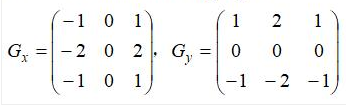

##### Operador de Prewitt

El operador de Prewitt es similar al de Sobel, sin una constante c.

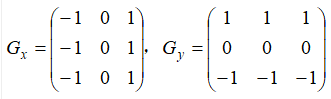

##### Operador de Kirsch

Publicado en 1971, las máscaras de la técnica de Kirsch se definen rotando una sola en las ocho direcciones principales de un compás (Norte, Noroeste, Oeste, Suroeste, Sur, sudeste,este y noreste). La magnitud del borde está definida por el valor máximo de la convolución de cada máscara con la imagen. La dirección está definida por la máscara que produjo dicha magnitud.


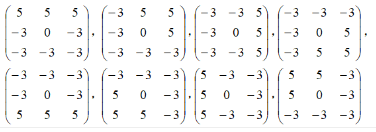

####Detectores Gaussianos: Canny

Creado por John Canny en 1986, incluso hoy en día, aún supera en resultados a muchos algoritmos desarrollados después. (Rani & Kumari, 2016). Es un algoritmo multi etapas:
* **Reducción de ruido**: Comúnmente usa la función Gaussiana como filtro para suavizar la imagen. Esto hace que algunos bordes se difuminen un poco, por lo que el borde calculado tiene un ancho. La implementación en Open CV es un filtro Gaussiano de 5x5.
* **Encontrar la gradiente de la intensidad**: La imagen resultante es filtrada con Sobel horizontal y verticalmente para obtener las derivadas de ambas direcciones.

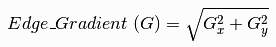

> Con el resultado de Sobel (Gx y Gy) se determina la magnitud de la gradiente, y luego su dirección.

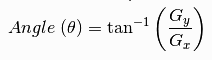

> La dirección de la gradiente siempre es perpendicular a los bordes. Se redondea a uno de cuatro ángulos posibles, representando dirección vertical, horizontal y dos diagonales.



* **Non-maximal suppresion**: El método para reducir el grosor de los contornos。Se realiza un escaneo de la imagen para quitar pixeles no deseados que no sean parte del borde. En cada pixel, este es revisado si es un máximo local en su vecindad en la dirección de la gradiente. El resultado es una imagen binario con bordes delgados

* **Umbralización**: Finalmente, se determina qué bordes son realmente bordes y cuáles no con dos umbrales, *minVal* y *maxVal*. Aquellos contornos con gradiente de intensidad mayor que *maxVal* se consideran bordes seguros, mientras se descartan aquellos menores a *minVal*. Los contornos en medio son clasificados según su conectividad con otros contornos. Esta etapa también elimina el ruido al asumir que los bordes son líneas largas.

> 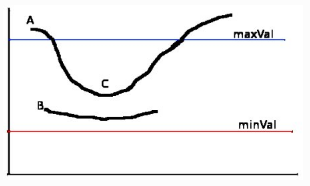

> El borde A, con intensidad mayor a *maxVal* es considerado un “borde seguro”. Aunque C está debajo de *maxVal*, está conectado a A, así que también se le considera borde y completa la curva. Por otro lado B, está en la misma región que C (mayor a *minVal* y menor a *maxVal*), pero no está conectado a ningún "borde seguro", así que es descartado.

> (*Ejemplo extraído de OpenCV - Python Tutorials*)

### Transformada de Hough

El objetivo de la transformada de Hough es la detección de un conjunto de puntos en la imagen que pertenecen a una curva específica, tal como el segmento de recta, circunferencia, elipse y otras. 

Para esto, emplea los conceptos del espacio de parámetros. Comúnmente representamos en el espacio en un sistema de coordenadas con ejes *'x'* e *'y'*, donde una línea puede ser representada con y = m*x + b, siendo m la pendiente de la recta y b la intercepcción con el eje *y*.

Hough plantea un espacio que toma como ejes a 'm' y 'b', los parámetros de la ecuación lineal.

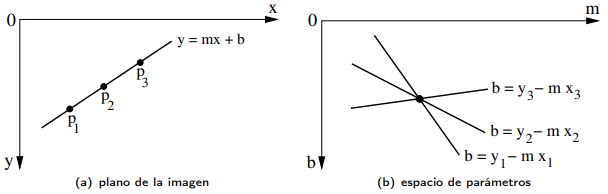

> *Imagen extraída de Pedrini, traducción de González Valenzuela, R.*

Así, una recta en el plano de la imagen se representa como un punto en el espacio de parámetros. Por otro lado, una recta en el espacio de parámetros representa a todas las rectas que podrían cruzar un punto (x, y); entonces, un punto en el plano de la imagen es una curva en el espacio de parámetros.

Una forma simple será representada por algunos parámetros. Por ejemplo, la línea necesita solo pendiente e intercepto, y un círculo puede representarse con 'x', 'y' y el radio.

La transformada de Hough, si desea buscar líneas, tendrá un problema si la recta es vertical, ya que la pendiente tiende al infinito. Por eso, en lugar de emplear la ecuación 
> y = mx + b

utiliza la forma polar:

> 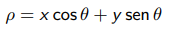

Donde rho es la distancia perpendicular del origen a la recta y theta el ángulo formado por esta recta perpendicular y el eje 'x'

> 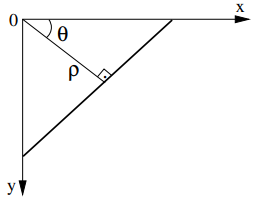

Se discretiza el espacio de parámetros y se obtiene una malla

>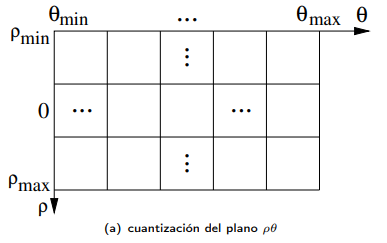

Donde theta puede variar de 0 a 180°, y rho de 0 a la raíz de la suma de cuadrados de M y N, la dimensión de la imagen. El número de celdas depende del intervalo de incremento de los parámetros, y determina la precisión.

Donde cada celda (rho,theta) es llamada una **celda de acumulación**.

Entonces, para círculos se busca transformar la función:

>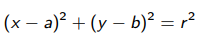

>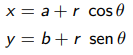

> 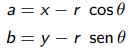

Une ambas ecuaciones para eliminar el parámetro r

> image.png

Discretizando los parámetros, las celdas de acumulación para los círculos estarían en (a,b), los parámetros que definen el centro de la circunferencia

1. Todas las celdas de acumulación inician con valor 0.
2. Por cada punto (x,y) de la imagen, calcula los valores de los parámetros que satisfacen la ecuación. Para círculos: a y b.
3. Calcula la magnitud de la gradiente en x,y y el ángulo
4. Para cada punto, incrementa las celdas de acumulación que cumplan la ecuación
5. Los picos locales en la matriz de acumulación son los centros de las circunferencias detectadas.

La implementación de OpenCV incluye los parámetros:
* dp: Ratio inverso de la resolución del acumulador con la resolución de la imagen. Por ejemplo, si vale 1, el acumulador tendrá la misma resolución que la imagen de entrada MxN. Si fuera 2, el acumulador tendría tamaño (M/2 x N/2.
minDist: Minimum distance between the centers of the detected
* min_dist: Distancia mínima entre los centros detectados.
* param_1: Umbral superior (maxVal) para el Canny interno.
* param_2: Umbral para la detección de centros. Más pequeño, detecta más círculos falsos.
* min_radius: El mínimo radio a ser detectado.
* max_radius: El máximo radio a ser detectado.

### Comparación de imágenes

#### Coeficiente de Pearsson

Indica si dos variables, en el caso de imágenes, las intensidades de dos imágenes en la misma posición, varían conjuntamente

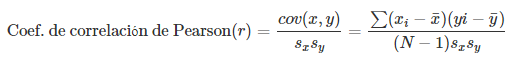

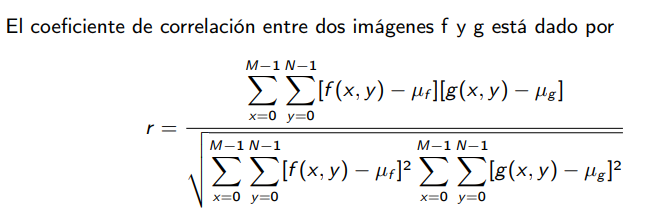

Donde la correlación en base al resultado *r*, en un rango de 0 a 1, comúnmente se interpreta de la siguiente manera:
- | r | <= 0.1 : Despreciable
- 0.1 < | r | <= 0.3: Baja
- 0.3 < | r | <= 0.5: Mediana
- | r | > 0.5: Fuerte o alta

#### Template Matching

### Metodología

## Código

###Importando librerías

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Operadores de Detección de bordes

#### Operador de Roberts

In [ ]:
def roberts(baw, arr=[True for _ in range(2)]): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  x = arr[0]
  y = arr[1]
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [ ]:
def sobel_prewitt(baw, c=2, arr=[True for _ in range(2)]):
  x = arr[0]
  y = arr[1]
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [92]:
def kirsch(baw,arr=[True for _ in range(8)],dumb=True):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  dArr = []    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if dumb and arr[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
    if not dumb:
      dArr.append(cv2.filter2D,baw,-1,mascaras[i]) # D_Arr guarda los resultados de la derivada en las 8 direcciones
  if dumb:
    return final
  #Si no es dumb, seleccionará el mayor d por pixel como dice la teoría
  m,n = baw.shape
  for i in range(m):
    for j in range(n):
      aux = []
      for d in dArr:
        aux.append(d[i][j])
      final[i][j] = np.max(aux)
  return final

#### Función para edgeDetection

In [ ]:
def edgeDetection(imagen, operador, arr = [True for _ in range(8)], c=2, usaC = False):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  filtrada = [] # >> Imagen Filtrada
  if usaC:
    filtrada = operador(imagen,c,arr)
  else:
    filtrada = operador(imagen,arr)
  if type(filtrada[0][0]) != np.uint8: #...Si el 'operador' es función de skimage devuelve float
    filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
  return filtrada

Función adicional que ahorra tiempo si se va a emplear el mismo filtro con los mismos parámetros varias veces durante el algoritmo

In [ ]:
def funcionFiltro(operador,arr=[True for _ in range(8)], c = 2, usaC = False, isCanny = False, minC=50,maxC=170):
  if isCanny:
    def auxCanny(imagen):
      # Si la imagen no está en escala de grises, convertirla a escala de grises
      if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()  
      return cv2.Canny(imagen,minC,maxC)
    return auxCanny
  if usaC:
    def auxEdgeDetection(imagen):
      if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
      filtrada = operador(imagen,c,arr)
      return filtrada
    return auxEdgeDetection
  def auxEdgeDetection(imagen):
    if len(imagen.shape) > 2:
      imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
    filtrada = operador(imagen,arr)
    return filtrada
  return auxEdgeDetection


TODO
```
if type(filtrada[0][0]) != np.uint8:#...Si el 'operador' es función de skimage devuelve float
      filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
```



### Transformada de Hough

####Círculos

In [ ]:
def HoughCirculo(filtrada, distMin, maxCanny, lessError, minRadio, maxRadio, orig = [[0 for _ in range(2)]]):
  circles = cv2.HoughCircles(filtrada, cv2.HOUGH_GRADIENT, 1, distMin, 
                             param1=maxCanny, param2=lessError, minRadius=minRadio, maxRadius=maxRadio)
  aux = [] # Imagen auxiliar para imagen con circulos encima
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = filtrada.copy()
    aux = cv2.cvtColor(aux,cv2.COLOR_GRAY2BGR)
  j = 1
  if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for i in circles:
      center = (i[0],i[1])
      radius = i[2]
      #cv2.circle(aux, center, 1, (0, 100, 100), 2) #Dibujar centro
      ## 
      aux = cv2.putText(aux, str(j), center, cv2.FONT_HERSHEY_SIMPLEX, 1, 
                        (255,0,0), 2, cv2.LINE_AA) 
      ## 
      j += 1
      cv2.circle(aux, center, radius, (255, 0, 255), 2) #Dibuja los circulos
  return circles, aux

#### Líneas

In [ ]:
def HoughLineas(filtrada,minLinea = 100,maxGap = 10,orig = [[0 for _ in range(2)]]):
  aux = []
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = cv2.cvtColor(filtrada,cv2.COLOR_GRAY2BGR)
  lines = cv2.HoughLinesP(filtrada,1,np.pi/180,100,minLinea,maxGap)
  if lines is not None:
    for x1,y1,x2,y2 in lines[0]:
      cv2.line(aux,(x1,y1),(x2,y2),(0,255,0),2)
    return lines[0], aux
  return [0]

###Funciones adicionales para determinar tipo de moneda

####Para crear función lineal simple

Las funciones *calcm()* y *creaymxb()* son auxiliares para generar una función lineal simple que permita convertir la distancia en la imagen de entrada a su escala real en milímetros

In [ ]:
def calcm(pt1,pt2):
  return (pt2[1] - pt1[1]) / (pt2[0] - pt1[0])

In [ ]:
def creaymxb(m,b):
  def aux(x):
    return m*x + b
  return aux

####Rotar imágenes de un arreglo

In [ ]:
def rotarArrIm(arrIm,cv2Funcion):
    auxArr = []
    for imagen in arrIm:
      auxArr.append(cv2.rotate(imagen, cv2Funcion))
    return auxArr

####Homogeneizar tamaño de las imágenes

La función *homoShape()* recibe dos imágenes, se asumen cuadradas o del mismo ratio, y reduce la imagen más grande a las dimensiones de la más pequeña.

In [ ]:
def homoShape(im1,im2):
  M1,_ = im1.shape
  M2,_ = im2.shape
  minM = min(M1,M2)
  if M1 != minM:
    im1 = cv2.resize(im1,im2.shape)
  elif M2 != minM:
    im2 = cv2.resize(im2,im1.shape)
  return im1,im2

#### Separar la imagen por Monedas

La función *separarMonedas()* recibe como entrada un arreglo de círculos (en formato [posición x, posición y, radio] ) y la imagen filtrada o en blanco o negro que se quiere recortar. Retorna un arreglo de imágenes cuadradas de las monedas según el arreglo de entrada.

In [ ]:
def separarMonedas(circulos, filtrada):
  monedas = []
  for circulo in circulos:
    cx, cy, radio = circulo
    im = filtrada[cy-radio:cy+radio,cx-radio:cx+radio]
    monedas.append(im)
  return monedas

###Comparar Imágenes

####Coeficiente de correlación de Pearsson

Se implementa coeficiente de correlación de Pearsson, con un umbral variable para ajustar la eficiencia. Cambia el tamaño de la imagen más grande para poder realizar la comparación.

In [ ]:
def compararImPearsson(im1,im2,umbral=0.5):
  im1,im2=homoShape(im1,im2) # Reducir la imagen más grande para que tengan mismo shape
  desvEst1 = np.std(im1)
  desvEst2 = np.std(im2)
  covarianza = np.cov(im1.flatten(),im2.flatten(),bias=True)[0][1]
  r = abs(covarianza/(desvEst1*desvEst2))
  #print("r:" r)
  if r > umbral: # r > 0.5 es una correlacion alta
    return True
  else:
    return False

####Match Template

In [ ]:
def compararImMatch(im1,im2_t,umbral=0.5,cv2Coef = cv2.TM_CCOEFF_NORMED): #Se asume shape es cuadrado
  im1,im2_t = homoShape(im1,im2_t)
  s,_ = im2_t.shape
  pQ = round(0.25*s)
  uQ = round(0.75*s)
  temp = im2_t[pQ:uQ,pQ:uQ] # Template: 1/4 central de la imagen
  res = cv2.matchTemplate(im1,temp,cv2Coef)
  loc = np.where(res >= umbral)
  i = 0
  #Opcional: Grafica en auxIm la región(es) donde hay coincidencia
  s = round(s/2)
  auxIm = cv2.cvtColor(im1,cv2.COLOR_GRAY2BGR)
  for pt in zip(*loc[::-1]):
    cv2.rectangle(auxIm, pt, (pt[0] + s, pt[1] + s), (0,0,255), 2)
  if len(loc[0]) == 0:
    return False, auxIm
  else:
    return True, auxIm

###Cargar Imágenes de Referencia

In [ ]:
df_diam = [20.5,23,22,25.5,22.2,24.3] #Diametro en mm de las monedas
df_valores = [0.1,0.2,0.5,1,2,5]

In [ ]:
sorted(df_diam)

[20.5, 22, 22.2, 23, 24.3, 25.5]

In [ ]:
repos = "https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/"
df = []
df_baw = []
for i in range(5):
  dfFile = "df%s.jpg"%(i)
  url = "%s%s"%(repos,dfFile)
  imdf = io.imread(url)
  imdf = cv2.cvtColor(imdf,cv2.COLOR_RGB2GRAY)
  print(imdf.shape)
  df.append(imdf)

(300, 300)
(300, 300)
(300, 300)
(715, 718)
(400, 400)


In [ ]:
df_canny = [0 for _ in range(len(df))]
def dfCanny(ind, minC, maxC):
  df_canny[ind] = cv2.Canny(df[ind],minC,maxC)
  plt.imshow(df_canny[ind],cmap='gray')

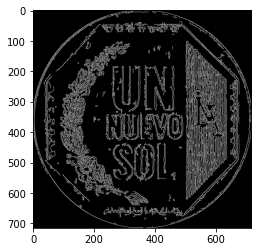

In [ ]:
#@title Canny para Monedas de Referencia { run: "auto" }
op_ind = 3#@param{type:"slider", min:0, max:4, step:1}
minC = 100#@param{type:"slider", min:0, max:254, step:1}
maxC = 255#@param{type:"slider", min:0, max:255, step:1}
dfCanny(op_ind,minC,maxC)

###Calcular el valor de las monedas

In [ ]:
def parte1(imMonedas,umbral=0.5,matchT=True,cv2Coef=cv2.TM_CCOEFF_NORMED):
  valInput = [0 for _ in range(len(imMonedas))] #Todas las monedas empiezan valiendo 0  
  auxInput = [-1 for _ in range(len(imMonedas))]
  f = False
  def comparar(dfRef,um):
    for j in range(len(imMonedas)):
      for i in range(len(dfRef)):
        same = False
        if matchT:  same,_ = compararImMatch(imMonedas[j],dfRef[i],um,cv2Coef)
        else:       same = compararImPearsson(imMonedas[j],dfRef[i],um)
        if same:
          valInput[j] = df_valores[i] #La imagen j ya tiene valor
          auxInput[j] = i #Guarda el indice de df que es la moneda j del input
          return True #Greedy, funciono
    return False
  k = 0
  um = umbral
  df_aux = df
  while not f:
    f = comparar(df_aux,um)
    um = um - int(k/4)*0.25
    df_aux = rotarArrIm(df_aux,cv2.ROTATE_90_CLOCKWISE)
    k += 1
  print("k para determinar al menos 1 moneda:", k)
  return valInput, auxInput

In [ ]:
def parte2(circulos, valInput, auxInput, error=0.1):
  radios = circulos[:,2] # Solamente el 3er atributo (radio) de todos los circulos
  faltan = []
  ms = [] #arreglo de pendientes
  for i in range(len(circulos)):
    if auxInput[i] == -1:
      faltan.append(i)
    else:
      punto = (radios[i], df_diam[auxInput[i]] / 2 )
      ms.append(calcm((0,0),punto))
  print("Pendientes: ",ms)
  m = np.mean(ms) #.................. | Crea la función lineal, asumiendo
  escalamiento = creaymxb(m,0) #..... | siempre que 0 px = 0 mm
  for i in faltan:
    radioReal = escalamiento(radios[i])
    for j in range(len(df_diam)):
      if abs(radioReal - (df_diam[j]/2)) < error:
        valInput[i] = df_valores[j]
  return valInput

In [ ]:
def merge(imGris,imFiltro,maxCanny=220,umbral=0.5,errorRadial=0.09,matchT=True,cv2Coef=cv2.TM_CCOEFF_NORMED):
  def auxP1(dfRef):
    valInput, auxInput = parte1(imMonedas,dfRef,umbral=umbral,matchT=matchT,cv2Coef=cv2Coef)
    for val in valInput:
      if val != 0:
        print("Al menos 1 moneda tiene valor")
        return True, valInput,auxInput
    return False, valInput,auxInput
  #Pre. Aplicar Hogh para Detectar círculos. Separa las posibles monedas
  circulos,_ = HoughCirculo(imFiltro,imFiltro.shape[0]/30,maxCanny,50,50,120,cv2.cvtColor(imGris,cv2.COLOR_GRAY2BGR))
  imMonedas = separarMonedas(circulos,imGris)
  print("Se hallaron %s círculos"%(len(circulos)))
  #Parte 1: Heavy. compara las imágenes input y las de referencia con Match o Pearsson.
  valInput, auxInput = parte1(imMonedas,umbral,matchT,cv2Coef)
  print("Por ahora los valores son:",valInput)
  #Parte 2: Comparación por escala de Radios. Asigna por completo a todas las monedas, a no ser que el radio sea demasiado
  #........ asume que es un error de Hough y el círculo no es moneda (muy grande o muy pequeña)
  print("Avanzamos a la parte 2")
  valInput = parte2(circulos,valInput,auxInput,errorRadial)
  total = 0
  for val in valInput:
    total += val
  
  return total,valInput,imMonedas

In [ ]:
def testing(totalRes, valInput,monedasEsp, totalEsp):
  errorNcirc = abs(len(valInput) - monedasEsp)
  errorSumV = abs(totalRes - totalEsp)
  return errorNcirc, errorSumV

In [ ]:
def all(input,opEdge,arrEdge=[True for _ in range(8)],c=2,usaC=False):
  baw = cv2.cvtColor(input,cv2.COLOR_RGB2GRAY)
  

------------------

###Cargando la imagen

In [ ]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


In [ ]:
sol5 = io.imread("df5.jpg")

In [ ]:
baw5 = cv2.cvtColor(sol5,cv2.COLOR_RGB2GRAY)

In [ ]:
baw5 = cv2.Canny(baw5,20,240)

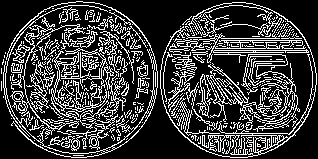

In [ ]:
cv2_imshow(baw5)

In [ ]:
circ5, imCirc = HoughCirculo(baw5,distMin=sol5.shape[0]/4,maxCanny=int(240),lessError=int(6),
                             minRadio=int(75),maxRadio=int(sol5.shape[0]/12),orig=sol5)

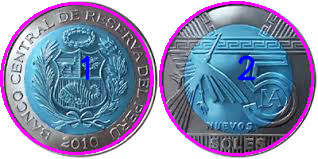

In [ ]:
cv2_imshow(imCirc)

In [ ]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

In [ ]:
func = funcionFiltro(sobel_prewitt,c=2,usaC=True)


In [ ]:
im_edge2 = func(imagen)

In [ ]:
plt.imshow(im_edge2,cmap='gray')

In [ ]:
im_edge = edgeDetection(baw,sobel_prewitt,c=1,usaC=True)
plt.imshow(im_edge,cmap='gray')

In [ ]:
total, aux1, imAuxs = merge(baw,im_edge,maxC,umbral=0.8,matchT=False)
testing(total,aux1,8,9.6)

In [ ]:
cv2_imshow(imAuxs[4])

In [ ]:
aux1

In [ ]:
#@title Canny { run: "auto" }
minC = 70#@param{type:"slider", min:0, max:254, step:1}
maxC = 210#@param{type:"slider", min:0, max:255, step:1}
im_canny = cv2.Canny(baw,minC,maxC)
plt.imshow(im_canny,cmap='gray')

In [ ]:
total, aux1, imAuxs = merge(baw,im_canny,maxC,umbral=0.6,matchT=False)
testing(total,aux1,8,9.6)

## Conclusiones

## Bibliografía

* Martinez, J. (2020) *Understanding and implementing shape detection using Hough Transform with OpenCV and Python*. Recuperado de: https://livecodestream.dev/post/2020-05-26-hough-transformation/ 
* Open CV. Python Tutorials. *Canny Edge Detection* Recuperado de: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
* Programmer Sought. *Roberts, Sobel, Prewitt, Kirsch, Canny, Laplacian image edge detection principle and its code implementation*. Recuperado de: https://www.programmersought.com/article/2672737346/ 
* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf
* Sharifi, M., Fathy, M. & Tayefeh Mahmoudi, M. (2002) *A Classified and Comparative Study of Edge Detection Algorithms*. Recuperado de: http://www.es.ele.tue.nl/~heco/courses/PlatformDesign2008/WiCa-assignment/01000371.pdf